In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2024-02-05 13:26:30.257999: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 13:26:30.258077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 13:26:30.260666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 13:26:30.274280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-05 13:26:32.253395: W tensorflow/compiler/tf2tenso

In [4]:
df = pd.read_excel('CONSUMO MENSAL DE ENERGIA ELÉTRICA POR CLASSE.xls', sheet_name = 'CONSUMO INDUSTRIAL POR UF', header = 4, index_col = 0)
df.head(5)

,2004,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240
NaN,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,...,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
TOTAL POR UF,12008851.66,12141416.57,12608412.95,12887290.731,12832711.92,13107635.62,13306806.95,13592340.78,13460814.76,13534732.69,...,15970242.42,15786702.72,15751225.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rondônia,17012,15490,18641,16961,17462,18505,18387,19468,20556,19642,...,43035.41,42100.7,43743.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acre,1738.44,1724.13,1880.84,1714.65,1704.45,1961.75,1809.39,2103.44,2542.48,2220.39,...,3574.5,3518.33,4031.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amazonas,93449,101555.76,101814,102970.41,104589,107710,112740,113924.95,113649.57,126345.82,...,175915,160840,176895,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2 = df.loc[['São Paulo']].values.astype('float')
df2[0,:-12]

array([3499333.91, 3641580.49, 3677373.42, 3913242.19, 3753889.16,
       3936932.41, 3953979.88, 4052294.36, 4120856.27, 4128933.33,
       4092032.16, 4054099.24, 3691575.32, 3792977.51, 3860019.49,
       4013268.84, 3927007.68, 4011756.85, 4076122.85, 4133091.64,
       4164235.93, 4155937.68, 4090785.98, 4036283.16, 3856964.24,
       4055481.62, 4198222.16, 4194942.2 , 4052097.98, 4151300.84,
       4165531.97, 4273783.44, 4224977.28, 4280542.4 , 4300324.22,
       4275335.72, 4049589.  , 4188532.  , 4329715.  , 4507532.  ,
       4439199.  , 4544459.  , 4426115.  , 4488819.  , 4661174.  ,
       4590297.  , 4690139.  , 4536199.  , 4221172.  , 4467742.  ,
       4408751.  , 4470594.  , 4525926.  , 4471787.  , 4615994.  ,
       4763449.  , 4632118.  , 4701595.  , 4594345.  , 4159358.  ,
       3662816.  , 3928530.  , 4087697.  , 4168105.  , 4108187.  ,
       4137079.  , 4252347.  , 4386733.  , 4463013.  , 4574343.  ,
       4565298.  , 4276521.  , 3864342.  , 4371815.  , 4485528

In [6]:
index = pd.date_range('2004 Jan', periods = len(df2[0,:-12]), freq = 'ME')
ts = pd.Series(df2[0,:-12], index= index)
ts = (ts/1000).round(4)
ts

2004-01-31    3499.3339
2004-02-29    3641.5805
2004-03-31    3677.3734
2004-04-30    3913.2422
2004-05-31    3753.8892
                ...    
2022-08-31    4408.5100
2022-09-30    4425.5522
2022-10-31    4328.2372
2022-11-30    4269.7298
2022-12-31    4100.0319
Freq: ME, Length: 228, dtype: float64

In [7]:
ts.describe().round(3)

count     228.000
mean     4233.050
std       325.159
min      3104.146
25%      4006.406
50%      4196.959
75%      4522.942
max      4849.895
dtype: float64

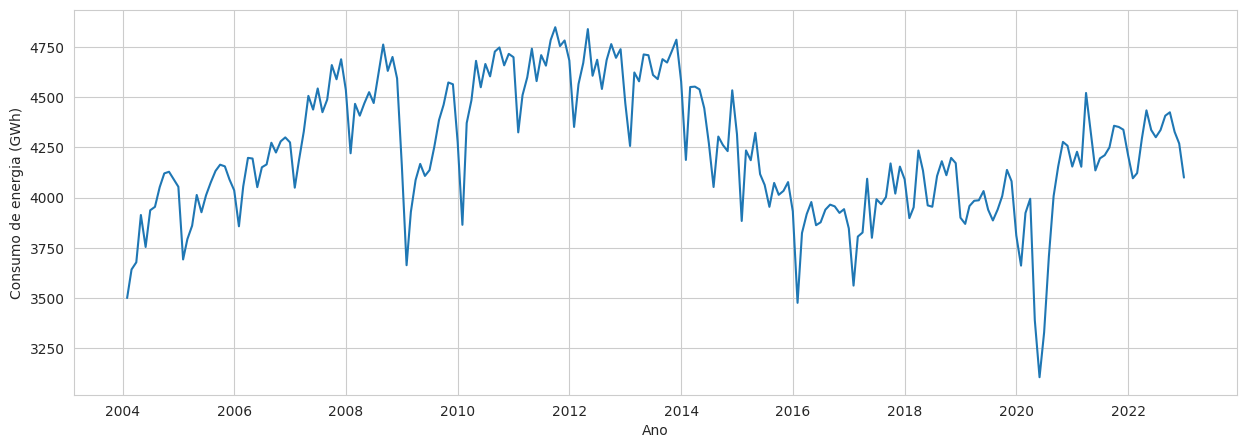

In [8]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(ts, linewidth = 1.5)
ax.set_ylabel('Consumo de energia (GWh)')
ax.set_xlabel('Ano')
plt.grid(visible=True, axis='both')
plt.show()

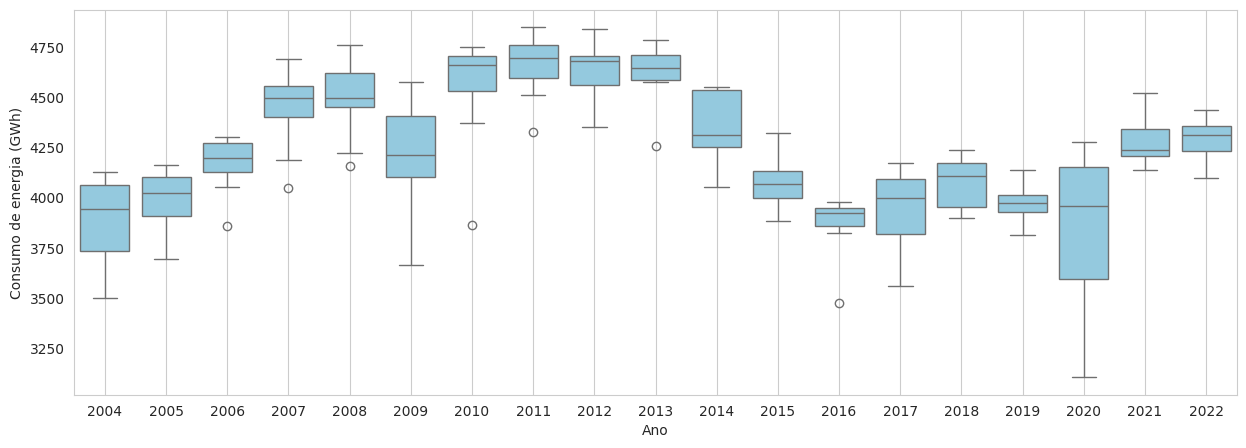

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = ts.index.year,
                color = 'skyblue',
                y = ts.values,
                ax = ax)
ax.set_xlabel('Ano')
ax.set_ylabel('Consumo de energia (GWh)')
plt.grid()
plt.show()

/tmp/ipykernel_44428/2394867806.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez',])


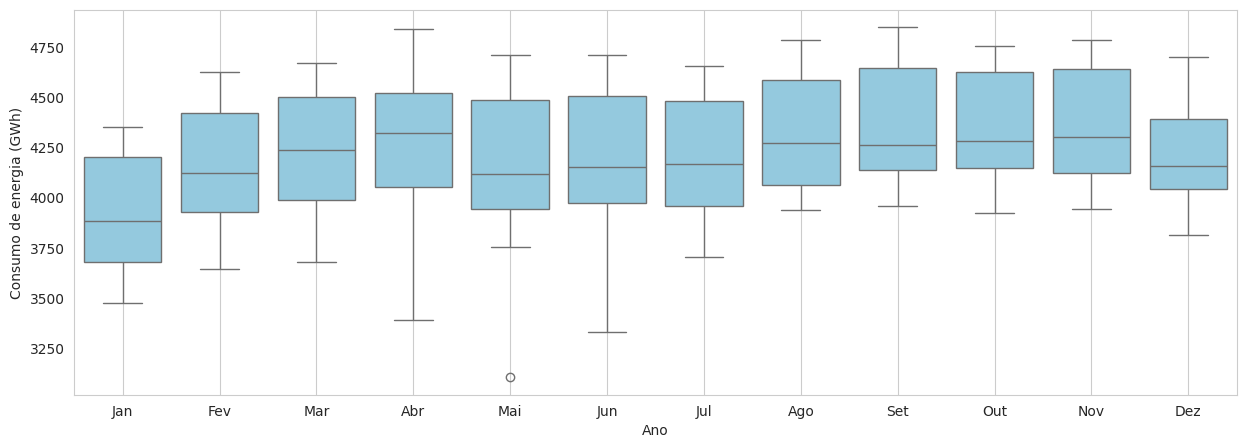

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = ts.index.month,
                y = ts.values,
                color = 'skyblue',
                ax = ax)
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez',])
ax.set_xlabel('Ano')
ax.set_ylabel('Consumo de energia (GWh)')
plt.grid()
plt.show()

In [11]:
treino_ate_2021 = ts.loc[:'2021']
teste_2022 = ts.loc['2022']

treino_ate_2020 = ts.loc[:'2020']
teste_2021 = ts.loc['2021']

treino_ate_2019 = ts.loc[:'2019']
teste_2020 = ts.loc['2020']

treino_ate_2018 = ts.loc[:'2018']
teste_2019 = ts.loc['2019']


In [ ]:
def erros(real, previsto, arredondamento = 2):
    erros_calculados = {'rmse':np.sqrt(mean_squared_error(real,previsto)).round(arredondamento) ,
                        'mape': mean_absolute_percentage_error(real,previsto).round(arredondamento)}
    return erros_calculados

# Ajuste do modelo ARIMA